##Data Fetching

In [57]:
import pandas as pd 
import numpy as np

In [58]:
df1= pd.read_csv('dialect_dataset.csv')


In [59]:
df1.head()

,id,dialect
0,1175358310087892992,IQ
1,1175416117793349632,IQ
2,1175450108898565888,IQ
3,1175471073770573824,IQ
4,1175496913145217024,IQ


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


In [61]:
df1=df1.astype({'id':'string'})

In [62]:
ids=list(df1.id.values)

In [63]:
used=ids[:1000]

In [64]:
print(used[:3])

['1175358310087892992', '1175416117793349632', '1175450108898565888']


In [65]:
import requests
import json
import asyncio

url = 'https://recruitment.aimtechnologies.co/ai-tasks'
myobj = {'id' : used}

response = requests.post(url, json=used)
response.json()


{'1175358310087892992': '@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .',
 '1175416117793349632': '@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. حيونه ووحشيه .. وتطلبون من الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب ..',
 '1175450108898565888': '@KanaanRema مبين من كلامه خليجي',
 '1175471073770573824': '@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐',
 '1175496913145217024': '@hmo2406 وين هل الغيبه  اخ محمد 🌸🌺',
 '1175668034146643968': '@Badi9595 @KanaanRema يااخي الإرهابي اذا كان عراقي سعودي فلسطيني وين المشكلة على باب الفرض...خليجي وماعنده رحمه وين المساس بقدسيتك .. الله يرضى عنك خلصت مشاكل العرب واختلفنا بجنسيت ابو الطفل .. المغردين سألوا من وين ورجحت وين الكارثة اللي وصلتك',
 '1175670153884983296': '@SarahNadhum90 @nUBNTdfVgACYQxV مطلبي يقدم استقالته وفوگاها اعتذار',
 '1175671762580856832': '@KanaanRema @Badi9595 خلص والله لعيونكم انا ماعندي شيء معه بالعكس من متابعيني اللي بعتز فيهم ... خلص صافية لبن 🌸🙏🌷',
 '1175715664398561280': '@SalahAlarbawi يمكن سؤال فات الكثير اللي يصور   شنو 

In [66]:
dict_responses=dict(response.json())

In [67]:
def process_list(my_list):
    url = 'https://recruitment.aimtechnologies.co/ai-tasks'
    r = requests.post(url, json=my_list)
    return r
    


for i in range(1000, len(ids), 1000):
    dict_responses.update(process_list(ids[i:i+1000]).json())


In [68]:
len(dict_responses)

458197

In [69]:
data_items = dict_responses.items()
data_list = list(data_items)

df = pd.DataFrame(data_list)
df.head()

,0,1
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [70]:
df['dialect']=df1.dialect.values

In [71]:
df.head()

,0,1,dialect
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,IQ
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ


In [72]:
df.drop(0,axis=1,inplace=True)

In [73]:
df.rename(columns={1:'text'},inplace=True)

In [74]:
df.head()

,text,dialect
0,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,@KanaanRema مبين من كلامه خليجي,IQ
3,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ


In [75]:
df.tail(5)

,text,dialect
458192,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅,BH
458193,@Zzainabali @P_ameerah والله ماينده ابش يختي,BH
458194,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...,BH
458195,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋,BH
458196,@jolnar121 السحله ضيفي ي بتطلع لك سحليه😅😅,BH


In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458197 entries, 0 to 458196
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     458197 non-null  object
 1   dialect  458197 non-null  object
dtypes: object(2)
memory usage: 10.5+ MB


##Data Cleaning

In [78]:
df['text'] =  df['text'].str.replace('(@\w+.*?)',"")
df['text'] = df['text'].str.replace('\n', '')
df['text'] = df['text'].str.replace('\t', ' ')
df['text'] = df['text'].str.replace(' {2,}', ' ', regex=True)
df['text'] = df['text'].str.strip()
df['text']=  df['text'].str.replace('.',"")
df['text'] = df['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [79]:
df.head()

,text,dialect
0,لكن بالنهاية ينتفض يغير,IQ
1,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبو...,IQ
2,مبين من كلامه خليجي,IQ
3,يسلملي مرورك وروحك الحلوه💐,IQ
4,وين هل الغيبه اخ محمد 🌸🌺,IQ


In [83]:
import re 
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [84]:
df['text'] = df['text'].apply(remove_emoji)


In [85]:
df.head()

,text,dialect
0,لكن بالنهاية ينتفض يغير,IQ
1,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبو...,IQ
2,مبين من كلامه خليجي,IQ
3,يسلملي مرورك وروحك الحلوه,IQ
4,وين هل الغيبه اخ محمد,IQ


##Preprocessing & Modeling

##ML Model

In [86]:
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [87]:
x=df.text
y=df.dialect
X_train, X_test, y_train_text, y_test_text = train_test_split(x,y,test_size=0.2,stratify=y)

In [88]:
set(y)

{'AE',
 'BH',
 'DZ',
 'EG',
 'IQ',
 'JO',
 'KW',
 'LB',
 'LY',
 'MA',
 'OM',
 'PL',
 'QA',
 'SA',
 'SD',
 'SY',
 'TN',
 'YE'}

In [89]:
y_train=y_train_text.values.reshape(-1,1)
y_test=y_test_text.values.reshape(-1,1)

In [90]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
y_train

array([ 3, 10,  3, ..., 11,  6, 15])

In [92]:
le.inverse_transform(y_train)

array(['EG', 'OM', 'EG', ..., 'PL', 'KW', 'SY'], dtype=object)

In [93]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [94]:
text_clf = Pipeline([
 ('vect', CountVectorizer(min_df=2, ngram_range=(1, 3))),
 ('tfidf', TfidfTransformer()),
 ('clf', SGDClassifier(random_state=42)),])

In [95]:
text_clf.fit(X_train, y_train)
predicted=text_clf.predict(X_test)
print(accuracy_score(y_test,predicted))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5121890004364906


In [96]:
print(sklearn.metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.48      0.38      0.42      5259
           1       0.41      0.26      0.32      5258
           2       0.58      0.51      0.54      3237
           3       0.53      0.91      0.67     11527
           4       0.54      0.59      0.56      3099
           5       0.46      0.25      0.33      5584
           6       0.48      0.58      0.53      8422
           7       0.54      0.72      0.61      5524
           8       0.59      0.67      0.62      7300
           9       0.62      0.61      0.62      2308
          10       0.44      0.30      0.36      3823
          11       0.52      0.46      0.49      8749
          12       0.47      0.47      0.47      6214
          13       0.43      0.36      0.39      5367
          14       0.57      0.41      0.48      2887
          15       0.45      0.22      0.29      3248
          16       0.61      0.40      0.48      1849
          17       0.42    

In [97]:
import pickle 
pickle.dump(text_clf, open('SGDClassifier.pkl', 'wb'))


###DL Model

In [107]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
from keras.metrics import Precision , Recall , Accuracy , TruePositives , TrueNegatives , FalsePositives , FalseNegatives



In [108]:
vocab_size = 5000 
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' 

In [109]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [110]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [111]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(y)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train_text))
test_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test_text))

In [112]:
len(set(y))

18

In [113]:

model=Sequential()

model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(embedding_dim)))

model.add(Dense(19,activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          320000    
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 19)                2451      
                                                                 
Total params: 388,499
Trainable params: 388,499
Non-trainable params: 0
_________________________________________________________________
None


In [123]:
num_epochs = 3
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(test_padded, test_label_seq), verbose=2)


Epoch 1/3
11455/11455 - 2559s - loss: 1.7657 - accuracy: 0.4383 - val_loss: 1.7565 - val_accuracy: 0.4427 - 2559s/epoch - 223ms/step
Epoch 2/3
11455/11455 - 2557s - loss: 1.7072 - accuracy: 0.4565 - val_loss: 1.7396 - val_accuracy: 0.4458 - 2557s/epoch - 223ms/step
Epoch 3/3
11455/11455 - 2544s - loss: 1.6724 - accuracy: 0.4663 - val_loss: 1.7309 - val_accuracy: 0.4498 - 2544s/epoch - 222ms/step


In [116]:
model.save('model2.h1')


INFO:tensorflow:Assets written to: model2.h1/assets


INFO:tensorflow:Assets written to: model2.h1/assets


In [128]:
import matplotlib.pyplot as plt
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [126]:
loss, accuracy = model.evaluate(train_padded, training_label_seq, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_padded, test_label_seq, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.4997
Testing Accuracy:  0.4498


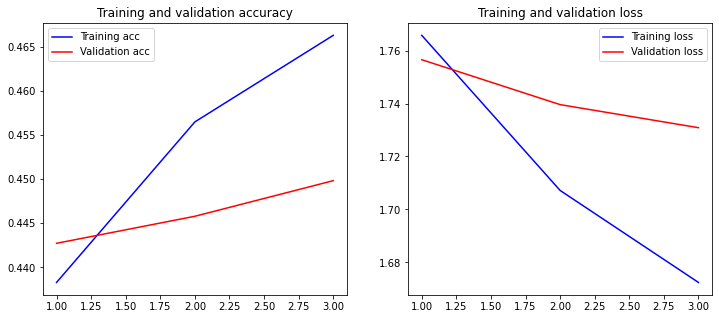

In [129]:
plot_history(history)